# DecisionTree_Classification

## Import Libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

### Q-1: Load the dataset and print the metadata in the notebook.

In [4]:
loan_data = pd.read_csv("loan_data.csv")

In [5]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
#We can observe that the data doesnt have any null values.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loan_data.describe(include="all")

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000



### Q-2: Create a countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid. Mention the insights from the same. 

<AxesSubplot:xlabel='purpose', ylabel='count'>

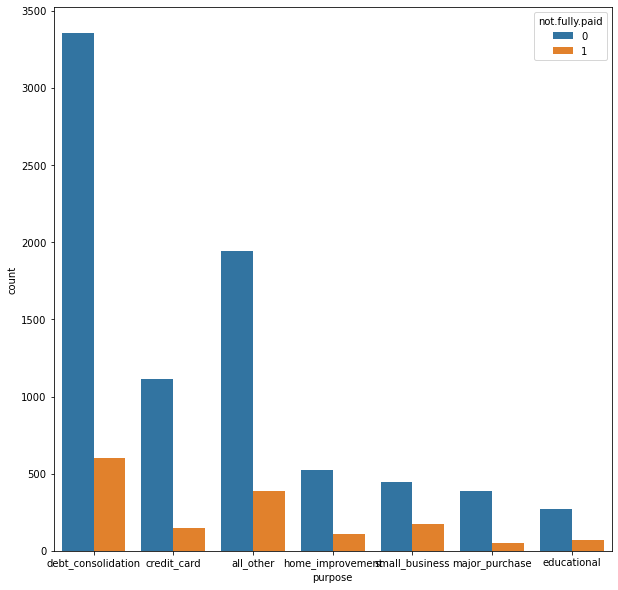

In [9]:
#From the below plot we can observe that debt_consolidation has the highest count for not.fully.paid.
plt.figure(figsize=(10,10))
sns.countplot(x="purpose", hue="not.fully.paid", data=loan_data)

### Q-3: Print a heatmap to check NULL values and Correlation values.

<AxesSubplot:>

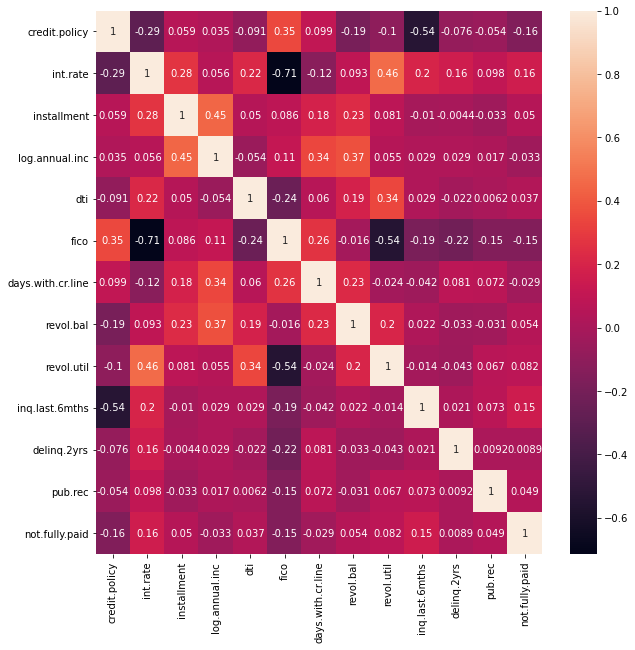

In [13]:
plt.figure(figsize=(10,10))
corr = loan_data.corr()
sns.heatmap(corr, annot=True)

### Q-4: Perform stratified splitting of train and test data to ensure similar class distribution. 

In [11]:
#purpose column has 7 unique values and of type object. We need to perform Encoding as 
loan_data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [10]:
 loan_data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [19]:
# Target-based encoding is numerization of a categorical variables via the target variable. Main purpose is to deal
# with high cardinality categorical features without exploding dimensionality. This replaces the categorical variable
# with just one new numerical variable. Each category or level of the categorical variable is represented by a
# summary statistic of the target for that level..
encoder = TargetEncoder()
loan_data['purpose'] = encoder.fit_transform(loan_data['purpose'], loan_data['not.fully.paid'])
print(loan_data['purpose'].unique())

[0.15238817 0.11568938 0.16602317 0.17011129 0.27786753 0.11212815
 0.20116618]


In [29]:
# here last column is the target column, so taking last column as target column
X = loan_data.iloc[:,:-1]
y = loan_data.iloc[:,-1]
# Scaling the features by using min max scaling
scaler = MinMaxScaler().fit(X)
X.iloc[:,:] = minmax_scale.transform(X.iloc[:,:])
X.iloc[:,:].head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1.0,0.242912,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0
1,1.0,0.021487,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0
2,1.0,0.242912,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0
3,1.0,0.242912,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0
4,1.0,0.021487,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0


In [30]:
# splitting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

### Q-5: Build a classifier model using the Decision Tree algorithm and plot the same.

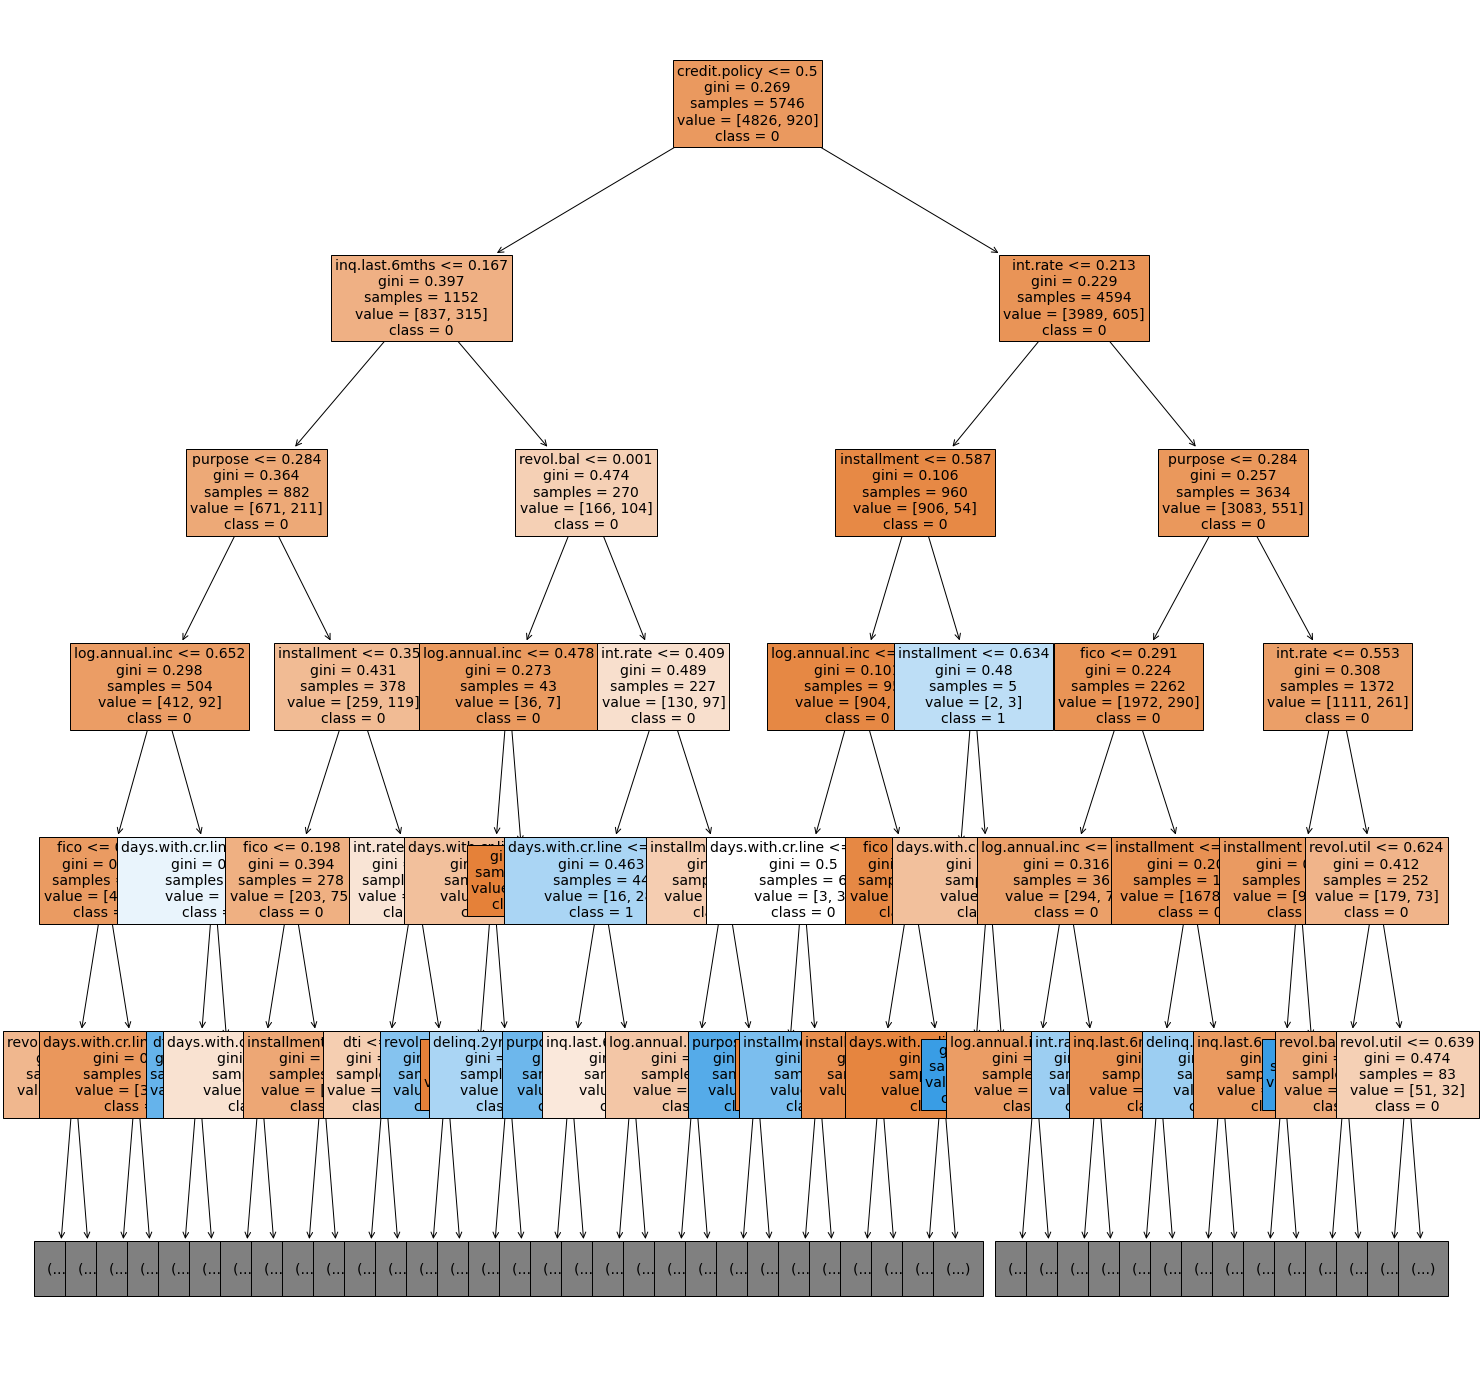

In [32]:
# building model with decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# plotting the decision tree with the train dataset
plt.figure(figsize=(25,25))
tree.plot_tree(dt, filled=True, max_depth=5, feature_names=X.columns,class_names=['0','1'],fontsize=14)
plt.show()

### Q-5: Print confusion matrix and classification report before and after pruning the Decision tree. Write down your observations on the effects of pruning.

In [33]:
# predicting the test data and calculating confusion  matrix
Y_predicted = dt.predict(X_test)
print(confusion_matrix(y_test, Y_predicted))

[[2668  551]
 [ 459  154]]


In [35]:
# generating calssification report like precision, recall, f1-score
print(classification_report(y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3219
           1       0.22      0.25      0.23       613

    accuracy                           0.74      3832
   macro avg       0.54      0.54      0.54      3832
weighted avg       0.75      0.74      0.74      3832



### Q-7: Find out the stratified cross-validation accuracy 

In [36]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=9)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.74647887 0.74835681 0.73496241 0.76409774 0.74154135 0.75657895
 0.7481203  0.63815789 0.48402256]
Accuracy: 0.71 (+/- 0.17)
